# Group Project:
    Dhairya shah
    Japan Patel
    Mihir Mathur
    Ravi Patel

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data_bitcoin = pd.read_csv("/Users/japanpatel/Desktop/Desktop/archive-2/coin_Bitcoin.csv")

In [3]:
data_bitcoin.head(5)

SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09

# Exploratory Data Analysis

In [4]:
from pandas_profiling import ProfileReport
bitcoin_report = ProfileReport(data_bitcoin)
bitcoin_report

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#selecting columns
bitcoin = data_bitcoin[['Date','High','Low']]

In [6]:
#converting type of date column from string to datetime.
bitcoin['Date'] = bitcoin['Date'].astype('datetime64[ns]')

<ipython-input-6-42181b773985>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin['Date'] = bitcoin['Date'].astype('datetime64[ns]')


In [7]:
#setting index columns as date column
bitcoin = bitcoin.set_index('Date')

In [8]:
bitcoin.index

DatetimeIndex(['2013-04-29 23:59:59', '2013-04-30 23:59:59',
               '2013-05-01 23:59:59', '2013-05-02 23:59:59',
               '2013-05-03 23:59:59', '2013-05-04 23:59:59',
               '2013-05-05 23:59:59', '2013-05-06 23:59:59',
               '2013-05-07 23:59:59', '2013-05-08 23:59:59',
               ...
               '2021-02-18 23:59:59', '2021-02-19 23:59:59',
               '2021-02-20 23:59:59', '2021-02-21 23:59:59',
               '2021-02-22 23:59:59', '2021-02-23 23:59:59',
               '2021-02-24 23:59:59', '2021-02-25 23:59:59',
               '2021-02-26 23:59:59', '2021-02-27 23:59:59'],
              dtype='datetime64[ns]', name='Date', length=2862, freq=None)

In [9]:
#bitcoin['Date'] = bitcoin['Date'].astype('datetime64[ns]')
high = bitcoin['High'].resample('MS').mean()
low = bitcoin['Low'].resample('MS').mean()

In [10]:
print(high['2020':])
print(low['2020':])

Date
2020-01-01     8490.318652
2020-02-01     9791.161827
2020-03-01     7182.894527
2020-04-01     7352.325467
2020-05-01     9451.186918
2020-06-01     9606.907898
2020-07-01     9672.627773
2020-08-01    11827.761244
2020-09-01    10844.910251
2020-10-01    12018.847827
2020-11-01    16945.980406
2020-12-01    22354.685699
2021-01-01    36206.557029
2021-02-01    47747.229024
Freq: MS, Name: High, dtype: float64
Date
2020-01-01     8202.997255
2020-02-01     9473.436932
2020-03-01     6619.607453
2020-04-01     7045.441829
2020-05-01     9048.870621
2020-06-01     9342.357011
2020-07-01     9434.339781
2020-08-01    11453.378859
2020-09-01    10470.011152
2020-10-01    11648.076730
2020-11-01    16064.074692
2020-12-01    21229.361979
2021-01-01    32705.655945
2021-02-01    44232.775692
Freq: MS, Name: Low, dtype: float64


# Visualising the data

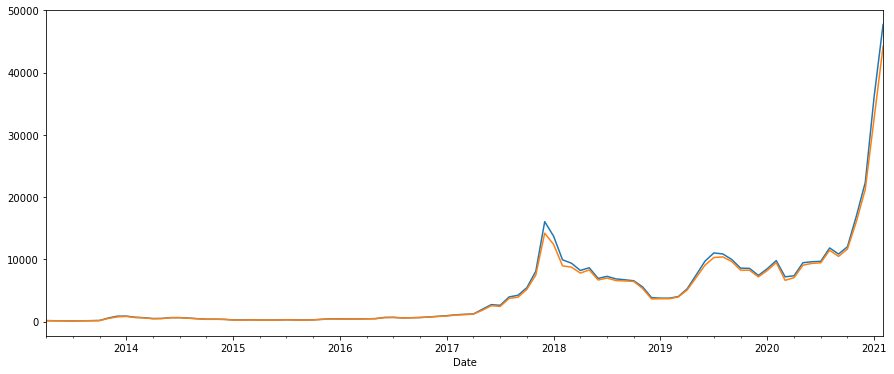

In [11]:
high.plot(figsize=(15, 6))
low.plot(figsize=(15,6))
plt.show()

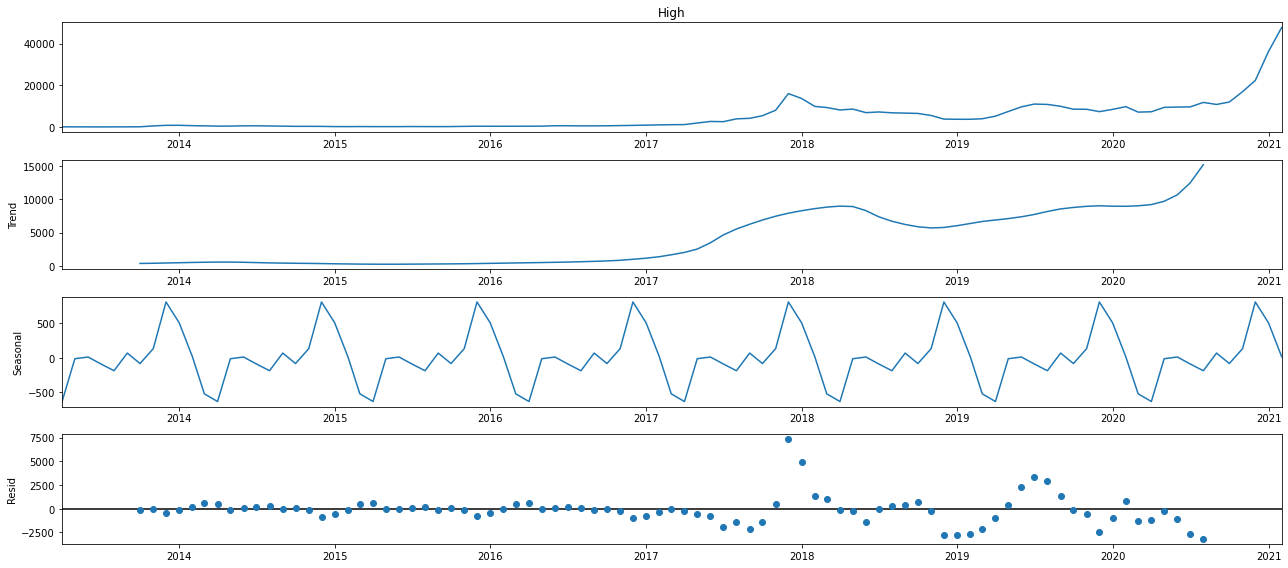

In [13]:
#visualising the trend, seasonal and residual decomposition of high.
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(high, model='additive')
fig = decomposition.plot()

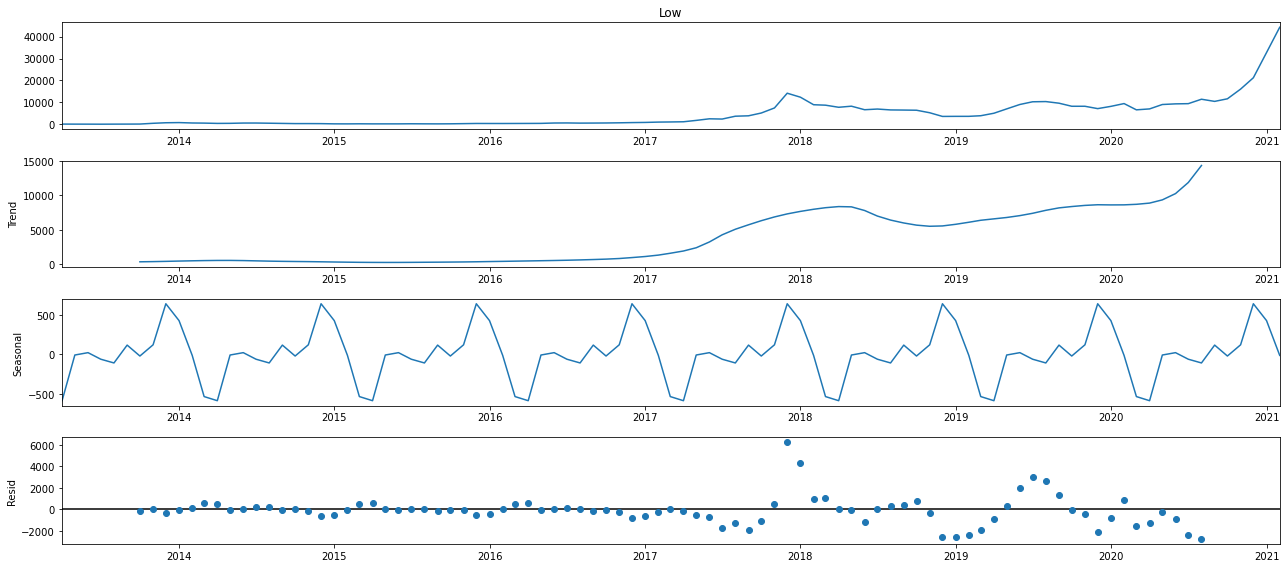

In [14]:
#visualising the trend, seasonal and residual decomposition of low.
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(low, model='additive')
fig = decomposition.plot()
plt.show()

In [15]:
#Finding best arima model. 
#lowest AIC values means best fit model.
import warnings
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            modelhigh = sm.tsa.statespace.SARIMAX(high,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            resultshigh = modelhigh.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, resultshigh.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1976.632209744148
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1718.5246994276483
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1682.3045298468107
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1453.2301810372733
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1699.0141167138122
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1665.2471515108582
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1469.059899482071
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1451.2220481945888
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1890.6128755196723
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1643.211288322269
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1603.2889457391066
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1373.2201321357718
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1680.4430058946477


/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1553.282103673833
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1411.8547370157326
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1373.6972265665097
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1711.1004564828695
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1503.579379622902
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1517.0895304207784
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1293.021182926581
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1521.126770781794
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1505.559298656574
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1318.6372832305044
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1294.830992270843
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1656.8103423441482
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1453.369782552516
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1476.2364384459424
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1254.8632894050136
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1487.6081446080746
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1455.3685528300919
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1295.995641797021


/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1288.1783715827487
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1477.3159212100643
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1459.7354144855274
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1292.7730509150676
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1269.3986066945545
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1662.2398924846793
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1462.0875482433853
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1487.566769540303
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1263.517479592689
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1461.3191903720221
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1464.0852342467504
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1271.9002049238381
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1265.2546558586141
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1646.2103973781316
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1445.2553860882324
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1472.1436000770161
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1249.1284165159957
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1462.66931895

In [17]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            modellow = sm.tsa.statespace.SARIMAX(low,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            resultslow = modellow.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, resultslow.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1963.5504059596024
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1706.104413970745
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1666.5561819365987
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1439.8030897787032
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1681.5440234039452
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1622.223615224498
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1455.418976497452
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1437.8077993505244
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1880.2930298644583
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1634.0026695003316
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1569.5997774109717
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1363.2735288547692
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1605.4869795670531


/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1539.7099664123568
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1401.6149019148754
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1363.4254526567884
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1692.1213993538101
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1486.9614068999433
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1499.0390369090123
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1282.0537337734058
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1504.3382128479666
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1488.9395723990244
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1303.6879356938164
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1281.245845489259
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1635.1486966107898
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1435.4956164963107
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1458.0451180544815
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1240.033446610061
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1469.5609133921196
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1437.397382191058
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1281.394946426

/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1270.9267289051165
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1455.498318302302
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1438.4796380569348
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1275.8142514036047
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1251.8751131302024
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1637.5441184803065
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1439.8218131560434
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1467.0946831210529
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1246.0918388936714
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1439.8378612477313
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1437.7057725612244
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1255.0546208043668
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1249.3703954190414
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1621.3064381019587
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1424.1512956186025
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1451.680751369073
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1231.4555733711438
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1440.75235533

# Fitting the Arima (AutoRegressive Integrated Moving Average ) model

In [35]:
modelhigh = sm.tsa.statespace.SARIMAX(high,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
resultshigh = modelhigh.fit()
print(resultshigh.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9513      0.148      6.412      0.000       0.661       1.242
ma.L1         -0.2975      0.213     -1.394      0.163      -0.716       0.121
ma.S.L12      -0.9066      0.465     -1.951      0.051      -1.817       0.004
sigma2      5.467e+06   1.49e+06      3.681      0.000    2.56e+06    8.38e+06


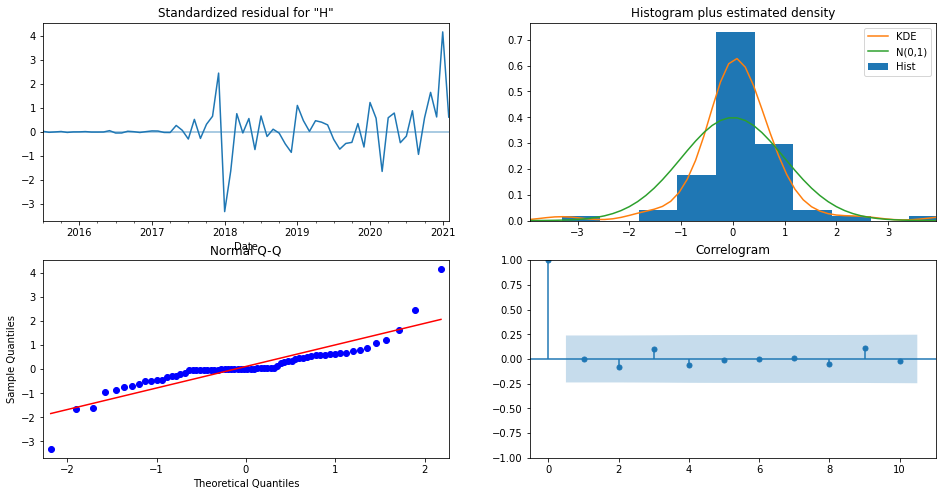

In [36]:
resultshigh.plot_diagnostics(figsize=(16, 8))
plt.show()

In [16]:
modellow = sm.tsa.statespace.SARIMAX(low,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
resultslow = modellow.fit()
print(resultslow.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0163      0.126      8.056      0.000       0.769       1.264
ma.L1         -0.3207      0.180     -1.786      0.074      -0.673       0.031
ma.S.L12      -0.8742      0.354     -2.469      0.014      -1.568      -0.180
sigma2      4.235e+06   8.22e+05      5.150      0.000    2.62e+06    5.85e+06


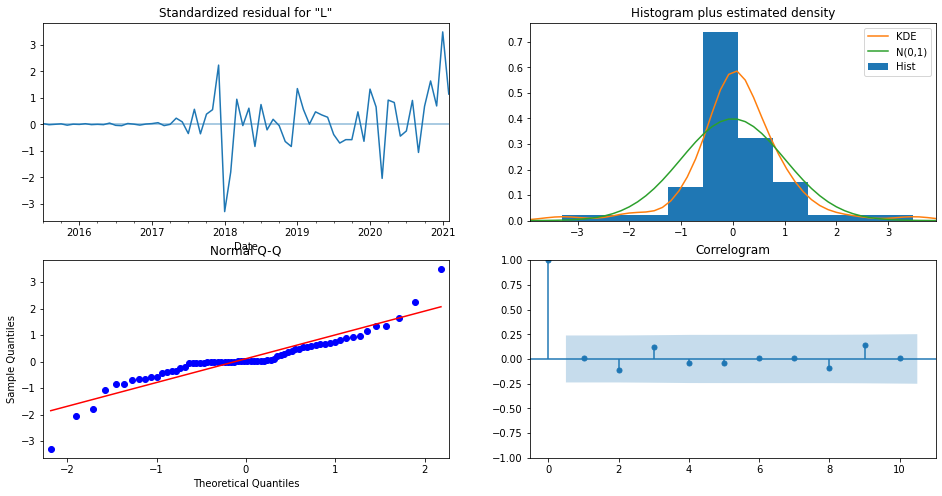

In [17]:
resultslow.plot_diagnostics(figsize=(16, 8))
plt.show()

# Validating forecast

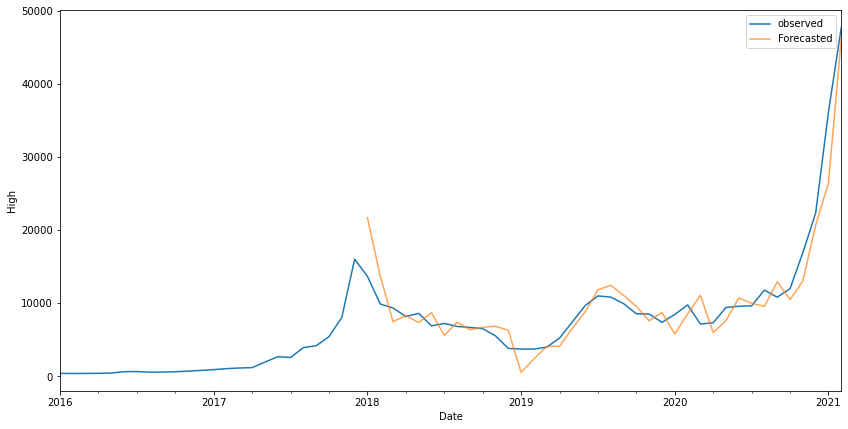

In [20]:
pred = resultshigh.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = high['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecasted', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('High')
plt.legend()
plt.show()

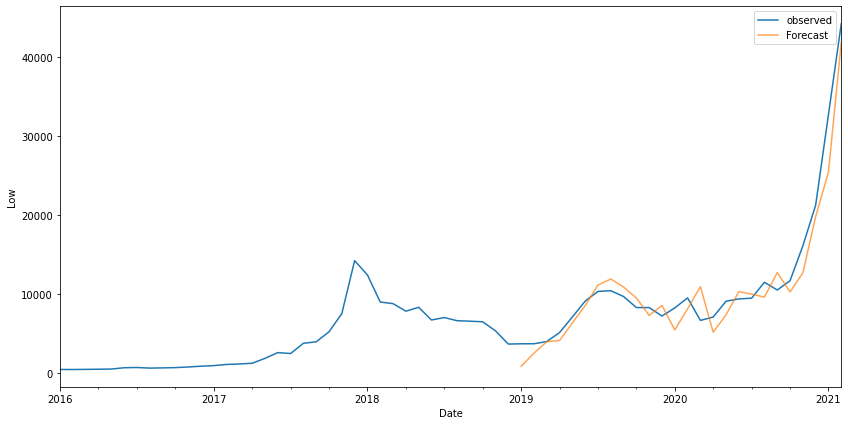

In [22]:
pred = resultslow.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = low['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Low')
plt.legend()
plt.show()

# 6 month Forecast visualisation

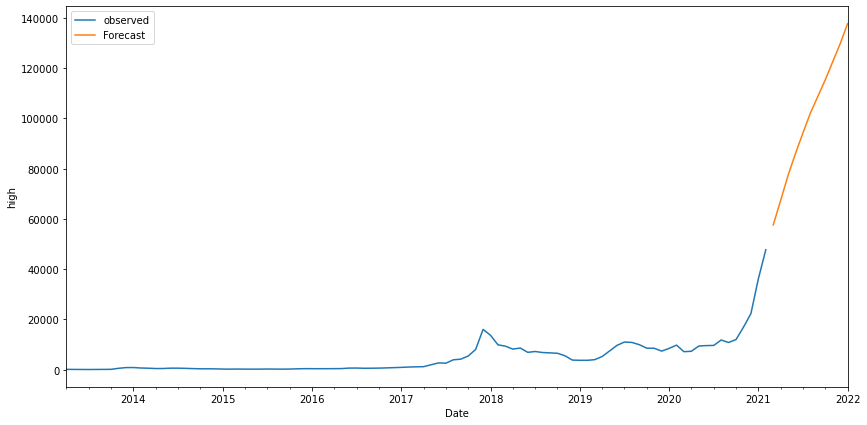

In [24]:
pred_uc = resultshigh.get_forecast(steps=11)
pred_ci = pred_uc.conf_int()
ax = high.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('high')
plt.legend()
plt.show()

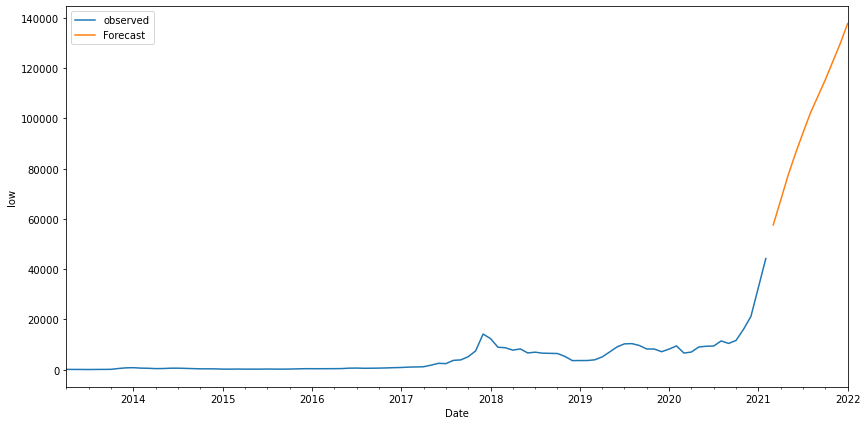

In [25]:
red_uc = resultslow.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()
ax = low.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('low')
plt.legend()
plt.show()